
## 🧪Students' IQ score Full Hypothesis Test Using Python


## 🎯 Objectives

- Understand how to set up **null (H₀)** and **alternative (H₁)** hypotheses
- Identify whether a hypothesis test is **left-tailed**, **right-tailed**, or **two-tailed**
- Visualize rejection regions and sampling distributions
- Apply **Z-tests** (for known population standard deviation) and **T-tests** (for unknown population standard deviation)
- Use **p-values** and **critical values** to make decisions about hypotheses
- Communicate results clearly with **graphs and test statistics**


- Perform all **5 steps** of hypothesis testing:
  1. State the hypotheses
  2. Choose significance level and test type
  3. Calculate test statistic
  4. Determine p-value or critical value
  5. Make a decision and interpret results

- Apply:
  - **Z-test** for IQ scores (known σ)
  - **T-test** for response times (unknown σ)

---

## 📈 Libraries Used

- `numpy`
- `matplotlib`
- `scipy.stats`


1.IQ scores of 50 students were analyzed, resulting in an average score of 110. Given that the population mean IQ is 100 with a standard deviation of 15, determine whether the principal's claim is valid at a 5% significance level.


In [ ]:
from scipy.stats import norm
import numpy as np

pop_mean = 100
pop_std = 15
sample_mean = 110
n = 50
alpha = 0.05

print(f"H₀: μ = {pop_mean} (school is not more intelligent)")
print(f"H₁: μ > {pop_mean} (school is more intelligent)")
print("This is a right-tailed test")


H₀: μ = 100 (school is not more intelligent)
H₁: μ > 100 (school is more intelligent)
This is a right-tailed test


In [ ]:

z_score = (sample_mean - pop_mean)/(pop_std/np.sqrt(n))
print(f"Z-score = {z_score:.4f}")

Z-score = 4.7140


In [ ]:
z_critical = norm.ppf(1-alpha)
print(f"Critical value = {z_critical:.4f} at α={alpha}")

Critical value = 1.6449 at α=0.05


In [ ]:

p_value = 1 - norm.cdf(z_score)
print(f"Z-scores: {z_score:.4f} > {z_critical:.4f}? {'yes' if z_score > z_critical else 'no'}")
print(f"p-value ({p_value:.4f}) < α ({alpha}): {'yes' if p_value < alpha else 'no'}")

Z-scores: 4.7140 > 1.6449? yes
p-value (0.0000) < α (0.05): yes


In [ ]:


if z_score > z_critical:
    print(f"Reject H₀: There is significant evidence that the school's students are more intelligent")
else:
    print(f"Fail to reject H₀: Insufficient evidence to support the claim")

Reject H₀: There is significant evidence that the school's students are more intelligent


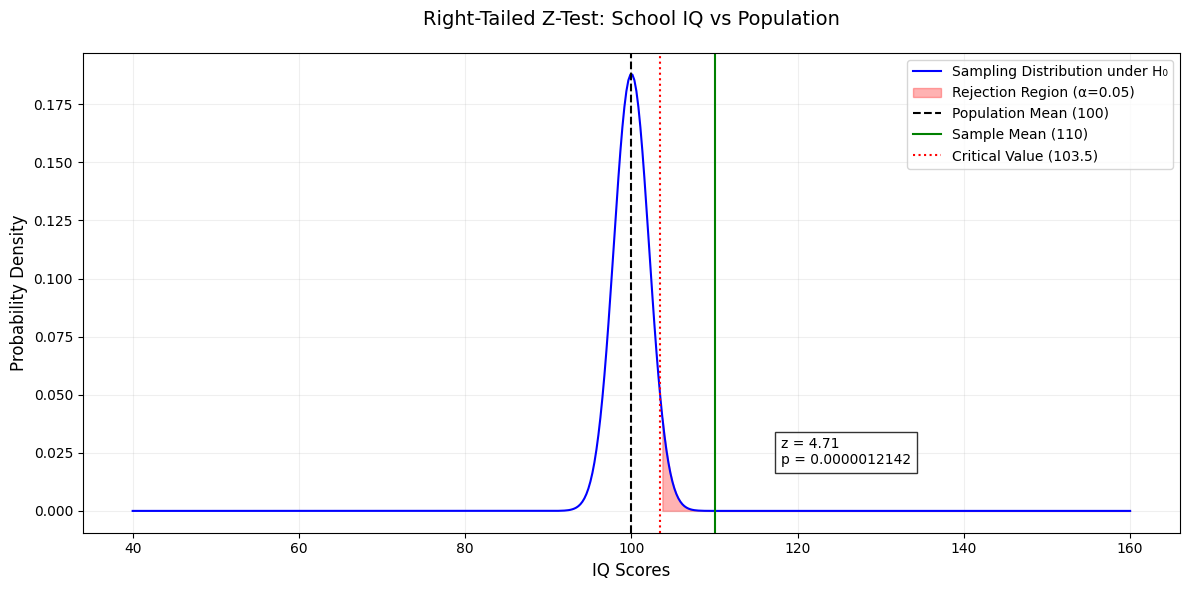

Test Results:
1. z-score: 4.7140
2. Critical z-value: 1.6449
3. p-value: 0.0000012142

Conclusion:
Reject H₀: The school's students are significantly more intelligent (p < 0.05)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


pop_mean = 100
pop_std = 15
sample_mean = 110
n = 50
alpha = 0.05

x = np.linspace(pop_mean-4*pop_std, pop_mean+4*pop_std, 500)
y = norm.pdf(x, loc=pop_mean, scale=pop_std/np.sqrt(n))


plt.figure(figsize=(12,6))
plt.plot(x, y, 'b-', label='Sampling Distribution under H₀')


critical_value = pop_mean + z_critical*pop_std/np.sqrt(n)
plt.fill_between(x, y, where=(x >= critical_value),
                color='red', alpha=0.3, label=f'Rejection Region (α={alpha})')


plt.axvline(pop_mean, color='k', linestyle='--', label=f'Population Mean ({pop_mean})')
plt.axvline(sample_mean, color='g', linestyle='-', label=f'Sample Mean ({sample_mean})')
plt.axvline(critical_value, color='r', linestyle=':', label=f'Critical Value ({critical_value:.1f})')


plt.title('Right-Tailed Z-Test: School IQ vs Population', pad=20, fontsize=14)
plt.xlabel('IQ Scores', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), fontsize=10)
plt.grid(alpha=0.2)


plt.text(118, 0.02, f'z = {z_score:.2f}\np = {p_value:.10f}',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


print(f"Test Results:")
print(f"1. z-score: {z_score:.4f}")
print(f"2. Critical z-value: {z_critical:.4f}")
print(f"3. p-value: {p_value:.10f}")
print("\nConclusion:")
if z_score > z_critical:
    print(f"Reject H₀: The school's students are significantly more intelligent (p < {alpha})")
else:
    print(f"Fail to reject H₀: No significant evidence (p > {alpha})")

2. A company claims that the average response time for their customer support hotline is less than 5 minutes. You conducted a sample of 36 calls and found that the average response time was 4.7 minutes with a standard deviation of 1.2 minutes. Conduct a hypothesis test to determine whether there is sufficient evidence to support the company's claim.

In [ ]:
from scipy.stats import t
import numpy as np

pop_mean = 5
sample_std_std = 1.2
sample_mean = 4.7
n = 36
alpha = 0.05

print(f"H₀: μ = {pop_mean} (company is not more responsive)")
print(f"H₁: μ < {pop_mean} (company is more responsive)")
print("This is a left-tailed test")

print('Since there is not population std it is subject for t-test')

H₀: μ = 5 (company is not more responsive)
H₁: μ < 5 (company is more responsive)
This is a left-tailed test
Since there is not population std it is subject for t-test


In [ ]:
t_score = (sample_mean - pop_mean)/(sample_std_std/np.sqrt(n))
print(f"t-score = {t_score:.4f}")

t-score = -1.5000


In [ ]:
t_critical = t.ppf(alpha,df=n-1)
print(f"Critical t-value = {t_critical:.4f} (α={alpha}, df={n-1})")

Critical t-value = -1.6896 (α=0.05, df=35)


In [ ]:
p_value = t.cdf(t_score,df=n-1)
print(f"t-statistic to critical value: {t_score:.4f} < {t_critical:.4f}? {'yes' if t_score < t_critical else 'no'}")
print(f"p-value ({p_value:.4f}) to α ({alpha}): {'yes' if p_value < alpha else 'no'}")

t-statistic to critical value: -1.5000 < -1.6896? no
p-value (0.0713) to α (0.05): no


In [ ]:


if t_score < t_critical:
    print(f"Reject H₀: Sufficient evidence to support the claim that response time <5 mins.")
else:
    print(f"Fail to reject H₀: Insufficient evidence to support the claim.")

Fail to reject H₀: Insufficient evidence to support the claim.


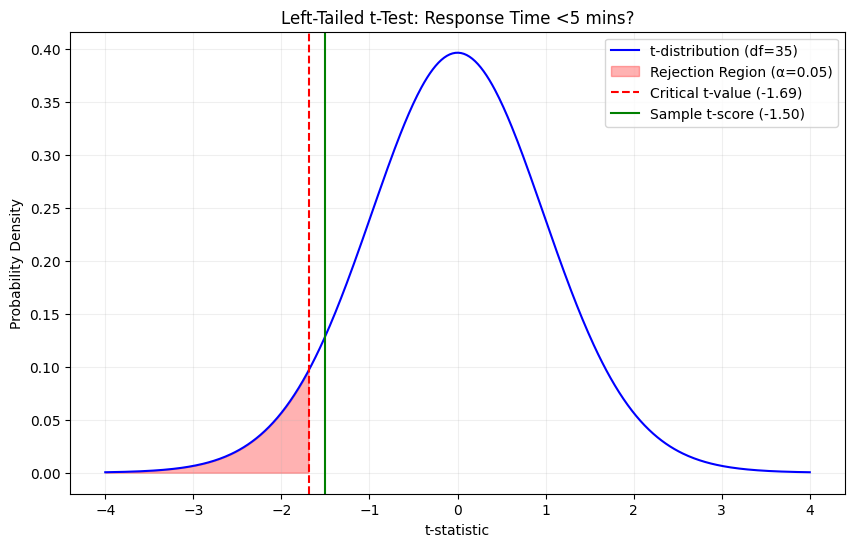

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import t


pop_mean = 5
sample_std = 1.2
sample_mean = 4.7
n = 36
alpha = 0.05

df = n - 1

t_score = (sample_mean - pop_mean) / (sample_std / np.sqrt(n))

t_critical = t.ppf(alpha, df=df)


x = np.linspace(-4, 4, 500)
y = t.pdf(x, df=df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label=f"t-distribution (df={df})")


plt.fill_between(x, y, where=(x <= t_critical), color='red', alpha=0.3, label=f'Rejection Region (α={alpha})')


plt.axvline(t_critical, color='r', linestyle='--', label=f'Critical t-value ({t_critical:.2f})')
plt.axvline(t_score, color='g', linestyle='-', label=f'Sample t-score ({t_score:.2f})')

plt.title('Left-Tailed t-Test: Response Time <5 mins?')
plt.xlabel('t-statistic')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(alpha=0.2)
plt.show()